# Learn Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [2]:
dates = pd.date_range('20130101',periods = 6)
dates

#df = pd.DataFrame(np.random.rand(6,4),index=dates,columns = list('ABCD'))
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))



In [3]:
df2 = pd.DataFrame({'A':1.,
                    'B':pd.Timestamp('20130102'),
                    'C':pd.Series(1,index = list(range(4)),dtype='float32'),
                    'D':np.array([3]*4,dtype='int32'),
                    'E':pd.Categorical(["test","train","test","Train"]),
                    'F':'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,Train,foo


In [4]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [5]:
df.head()
df.tail(3)
df.describe()
df.T#transposing data

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,1.099062,0.858764,-0.110842,2.309002,-1.504141,-0.563527
B,0.774310,0.604299,-0.421305,-0.171528,1.063920,1.313712
C,-0.243114,0.329076,0.641462,0.028270,-0.059414,-1.670576
D,0.423638,-0.033159,-1.019353,-0.803611,1.143132,1.360124


In [6]:
df.sort_index(axis = 1,ascending = False)
df.sort_values(by='B',ascending = False)

,A,B,C,D
2013-01-06,-0.563527,1.313712,-1.670576,1.360124
2013-01-05,-1.504141,1.063920,-0.059414,1.143132
2013-01-01,1.099062,0.774310,-0.243114,0.423638
2013-01-02,0.858764,0.604299,0.329076,-0.033159
2013-01-04,2.309002,-0.171528,0.028270,-0.803611
2013-01-03,-0.110842,-0.421305,0.641462,-1.019353


In [7]:
df['A']
df[0:2]

,A,B,C,D
2013-01-01,1.099062,0.774310,-0.243114,0.423638
2013-01-02,0.858764,0.604299,0.329076,-0.033159


In [8]:
df.loc[dates[0]]
df.loc[:,['A','B']]
df.loc['20130102':'20130104',['A','B']]


,A,B
2013-01-02,0.858764,0.604299
2013-01-03,-0.110842,-0.421305
2013-01-04,2.309002,-0.171528


In [9]:
df.iloc[1,1]
df.iat[1,1]
df[df<0]

,A,B,C,D
2013-01-01,NaN,NaN,-0.243114,NaN
2013-01-02,NaN,NaN,NaN,-0.033159
2013-01-03,-0.110842,-0.421305,NaN,-1.019353
2013-01-04,NaN,-0.171528,NaN,-0.803611
2013-01-05,-1.504141,NaN,-0.059414,NaN
2013-01-06,-0.563527,NaN,-1.670576,NaN


In [10]:
df.dropna(how='any')
df.fillna(value='5')
pd.isnull(df[df<0])
df.mean()
#df.mean(1) axis

A    0.348053
B    0.527235
C   -0.162383
D    0.178462
dtype: float64

In [11]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s
df.sub(s,axis = 'index')

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-1.110842,-1.421305,-0.358538,-2.019353
2013-01-04,-0.690998,-3.171528,-2.971730,-3.803611
2013-01-05,-6.504141,-3.936080,-5.059414,-3.856868
2013-01-06,NaN,NaN,NaN,NaN


In [12]:
df.apply(np.cumsum)#应用函数
df.apply(lambda x: x.max() - x.min())

A    3.813143
B    1.735017
C    2.312038
D    2.379477
dtype: float64

In [13]:
s = pd.Series(np.random.randint(0, 7, size=10))

s.value_counts()


5    2
4    2
1    2
0    2
3    1
2    1
dtype: int64

In [14]:
left = pd.DataFrame({'key':['foo','foo0'],'lval':[1,2]})
right = pd.DataFrame({'key':['foo0','foo'],'rval':[4,5]})
pd.merge(left,right,on='key')

,key,lval,rval
0,foo,1,5
1,foo0,2,4


In [15]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
s = df.iloc[3]

df.append(s, ignore_index=True)

,A,B,C,D
0,-1.444239,-0.219268,0.799373,0.746616
1,0.573108,-0.472571,-0.398642,-0.567622
2,0.347778,-0.824367,0.033749,-0.116988
3,-1.141837,0.478582,-0.059657,-0.385849
4,-0.235942,1.068231,0.549025,0.246977
5,0.025785,1.308273,0.574938,-0.860478
6,2.549577,-0.553982,0.489495,-0.281158
7,0.554106,0.477994,0.841257,-0.387895
8,-1.141837,0.478582,-0.059657,-0.385849


In [16]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df.groupby('A').sum();

In [17]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2 = df[:4]
df2
c

A         B
first second                    
bar   one     0.261675  1.742564
      two     0.410809  0.234286
baz   one    -1.000238  0.393538
      two     0.736379  1.312817

In [18]:
stacked = df2.stack()
stacked
stacked.unstack(2)

A         B
first second                    
bar   one     0.261675  1.742564
      two     0.410809  0.234286
baz   one    -1.000238  0.393538
      two     0.736379  1.312817

In [19]:
rng = pd.date_range('1/1/2012',periods=5,freq='M')
ts = pd.Series(np.random.randn(len(rng)),index = rng)
ps = ts.to_period()
ps.to_timestamp()

2012-01-01   -1.875078
2012-02-01   -1.475715
2012-03-01    1.263992
2012-04-01   -0.879641
2012-05-01   -2.036309
Freq: MS, dtype: float64

In [20]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00    0.400597
1990-06-01 09:00   -0.511114
1990-09-01 09:00    0.261966
1990-12-01 09:00    0.058584
1991-03-01 09:00    0.627707
Freq: H, dtype: float64

In [21]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df["grade"] = df["raw_grade"].astype("category")

df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df.sort_values(by="grade")
df

,id,raw_grade,grade
0,1,a,NaN
1,2,b,NaN
2,3,b,NaN
3,4,a,NaN
4,5,a,NaN
5,6,e,NaN


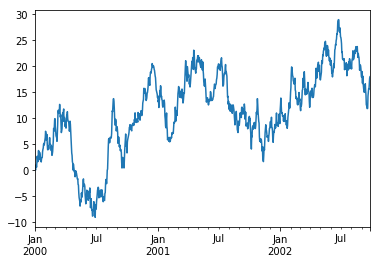

In [23]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()

ts.plot()

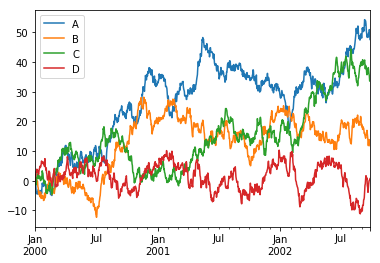

In [25]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df = df.cumsum()

plt.figure(); df.plot(); plt.legend(loc='best')

In [28]:
df.to_csv('foo.csv')
#pd.read_csv('foo.csv')
